# Osmosis 看圖說故事

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = os.getcwd()

In [3]:
osmosis = pd.read_csv(path + '/tokenTerminalData/osmosis.csv', index_col = 'datetime', parse_dates = True)
osmosis = osmosis.sort_index().drop(['Unnamed: 0'], axis = 1)
osmosis.rename(columns = {'price': 'OSMO'}, inplace = True)

In [4]:
# 加入 BTC 日收盤價

from cryptocmd import CmcScraper

scraper_BTC = CmcScraper("BTC", start_date = "23-6-2021", end_date = "18-2-2022", order_ascending = True)
BTC = scraper_BTC.get_dataframe(date_as_index = True)
BTC[['Close']].rename(columns = {'Close':'btcPrice'})
osmosis['BTC'] = list(BTC['Close'])

In [5]:
# 加入 ATOM 日收盤價

scraper_ATOM = CmcScraper("ATOM", start_date = "23-6-2021", end_date = "18-2-2022", order_ascending = True)
ATOM = scraper_ATOM.get_dataframe(date_as_index = True)
ATOM[['Close']].rename(columns = {'Close':'atomPrice'})
osmosis['ATOM'] = list(ATOM['Close'])

In [6]:
osmosis

,project,business_type,business_line,version,chain,component,OSMO,market_cap,market_cap_circulating,market_cap_fully_diluted,...,ps,ps_circulating,tvl,gmv,revenue,revenue_supply_side,revenue_protocol,token_incentives,BTC,ATOM
datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-23 00:00:00+00:00,Osmosis,total,total,total,total,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.977907e+07,NaN,NaN,NaN,NaN,NaN,33723.028978,10.097492
2021-06-24 00:00:00+00:00,Osmosis,total,total,total,total,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.976679e+07,4690740.0,13805.84250,13805.84250,0.0,NaN,34662.435894,10.339783
2021-06-25 00:00:00+00:00,Osmosis,total,total,total,total,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.976679e+07,14544087.0,43378.80480,43378.80480,0.0,NaN,31637.780055,9.141110
2021-06-26 00:00:00+00:00,Osmosis,total,total,total,total,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.765501e+07,9903061.0,30483.09660,30483.09660,0.0,NaN,32186.277671,9.543618
2021-06-27 00:00:00+00:00,Osmosis,total,total,total,total,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.321046e+07,7539730.0,23086.24160,23086.24160,0.0,NaN,34649.644588,10.049684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-14 00:00:00+00:00,Osmosis,total,total,total,total,NaN,8.151582,8.151582e+09,2.417274e+09,8.151582e+09,...,72.163590,21.399426,1.247615e+09,71253024.0,185339.35542,185339.35542,0.0,NaN,42586.919686,27.180001
2022-02-15 00:00:00+00:00,Osmosis,total,total,total,total,NaN,8.262668,8.262668e+09,2.456184e+09,8.262668e+09,...,70.931686,21.085356,1.382888e+09,92639015.0,492079.38314,492079.38314,0.0,NaN,44575.203334,28.938136
2022-02-16 00:00:00+00:00,Osmosis,total,total,total,total,NaN,9.026656,9.026656e+09,2.698053e+09,9.026656e+09,...,78.126261,23.351814,1.382888e+09,57780296.0,154468.54100,154468.54100,0.0,NaN,43961.859388,28.533708


## 幣價分析

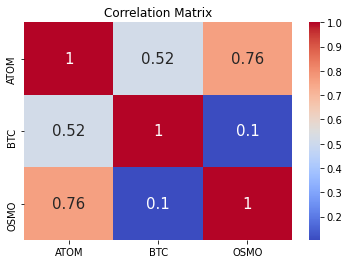

In [7]:
# 相關係數
plt.title('Correlation Matrix')
sns.heatmap(osmosis[['ATOM', 'BTC', 'OSMO']].dropna().corr(), annot=True, annot_kws={"size":15}, cmap='coolwarm')
plt.show()

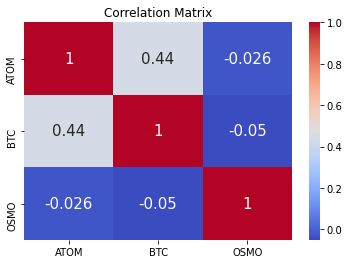

In [8]:
# 差分後相關係數
plt.title('Correlation Matrix')
sns.heatmap(osmosis[['ATOM', 'BTC', 'OSMO']].dropna().pct_change().corr(), annot=True, annot_kws={"size":15}, cmap='coolwarm')
plt.show()

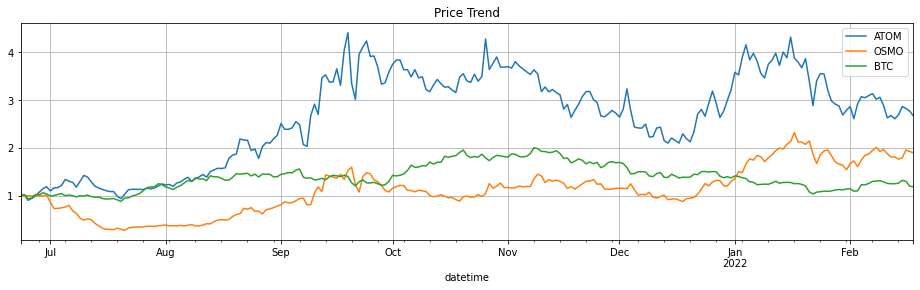

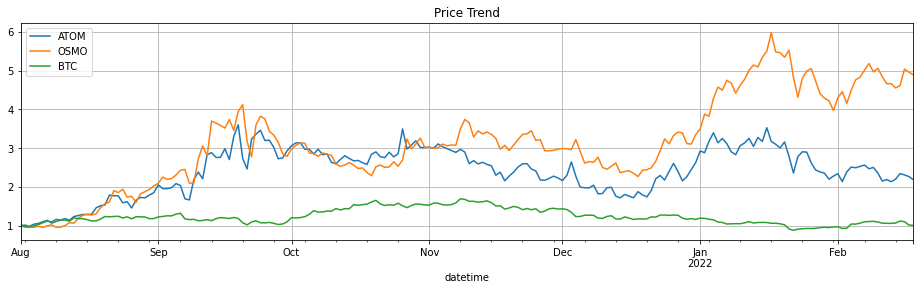

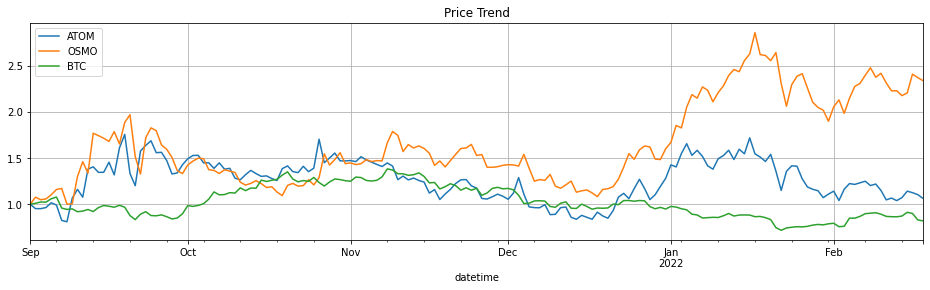

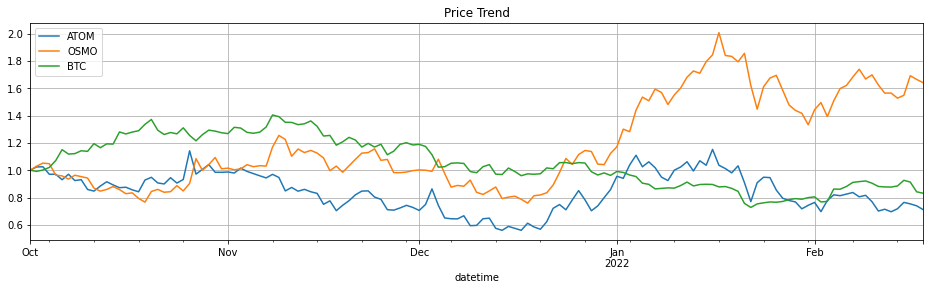

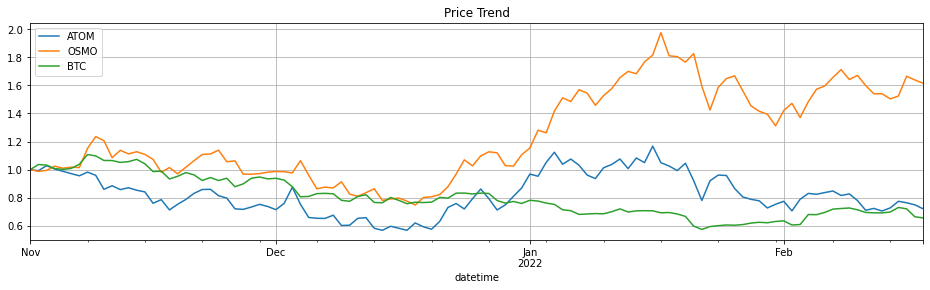

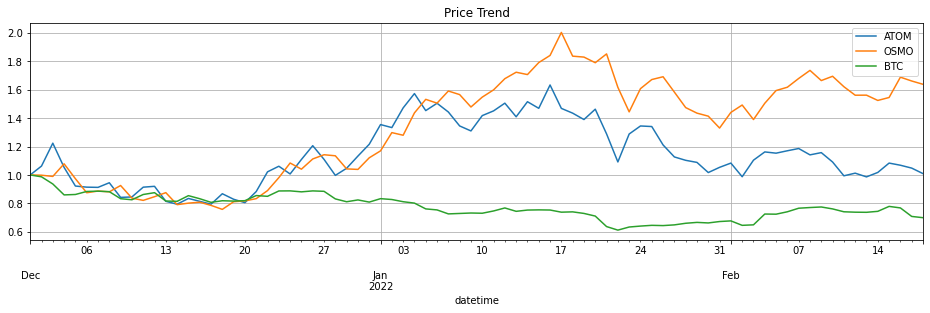

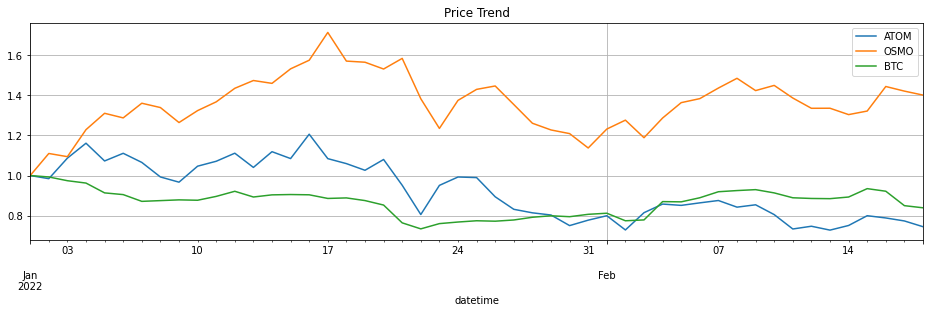

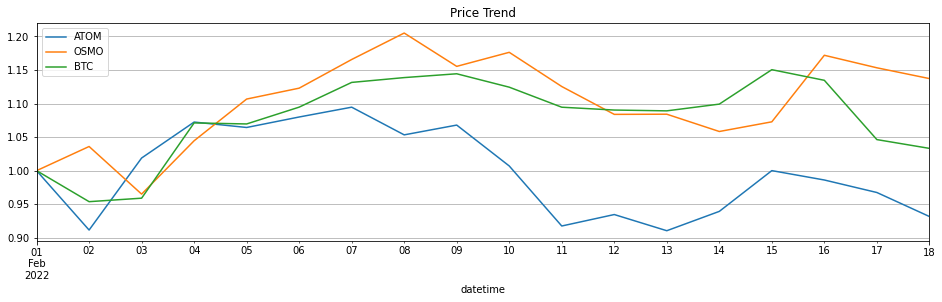

In [10]:
for date in ['2021-6', '2021-8', '2021-9', '2021-10', '2021-11', '2021-12', '2022-1', '2022-2']:

    ATOM_trend = (osmosis[['ATOM']].loc[date:].pct_change().fillna(0) + 1).cumprod()
    OSMO_trend = (osmosis[['OSMO']].loc[date:].pct_change().fillna(0) + 1).cumprod()
    BTC_trend = (osmosis[['BTC']].loc[date:].pct_change().fillna(0) + 1).cumprod()

    ax1 = ATOM_trend.plot()
    ax2 = OSMO_trend.plot(ax = ax1)
    BTC_trend.plot(figsize = (16,4), title = 'Price Trend', grid = True, ax = ax2);

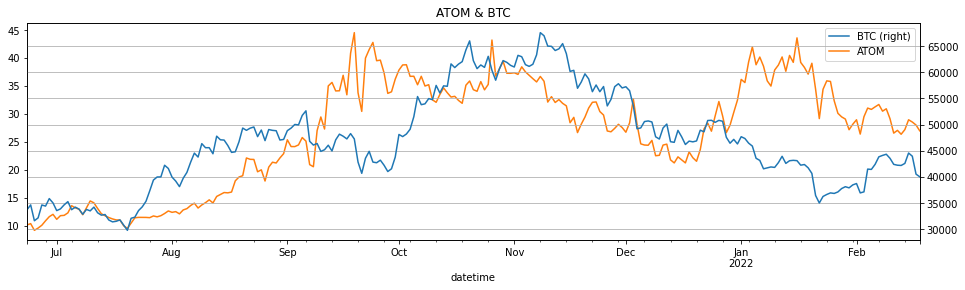

In [11]:
ax = osmosis[['BTC']].plot(secondary_y = True)
osmosis[['ATOM']].plot(figsize = (16,4), title = 'ATOM & BTC', ax = ax, grid = True);

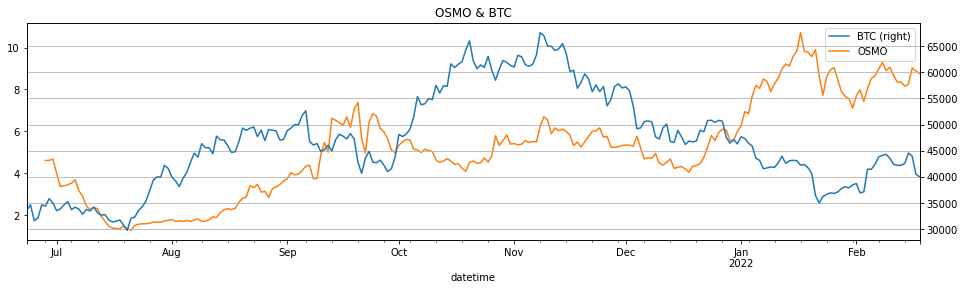

In [12]:
ax = osmosis[['BTC']].plot(secondary_y = True)
osmosis[['OSMO']].plot(figsize = (16,4), title = 'OSMO & BTC', ax = ax, grid = True);

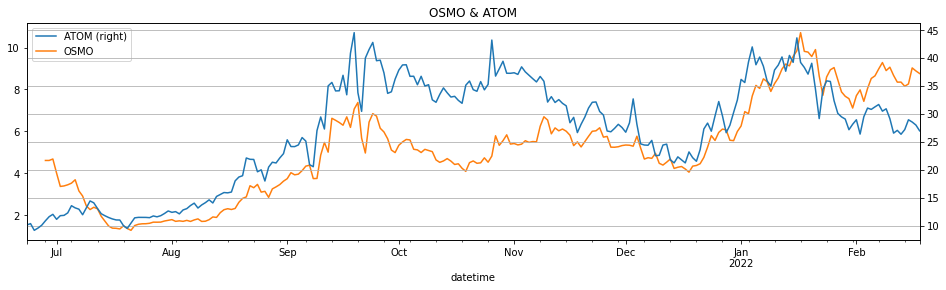

In [13]:
ax = osmosis[['ATOM']].plot(secondary_y = True)
osmosis[['OSMO']].plot(figsize = (16,4), title = 'OSMO & ATOM', ax = ax, grid = True);

## 幣價 & XX

error: project
error: business_type
error: business_line
error: version
error: chain


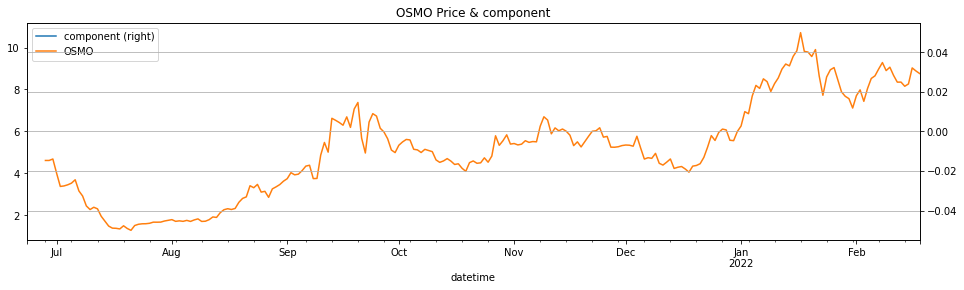

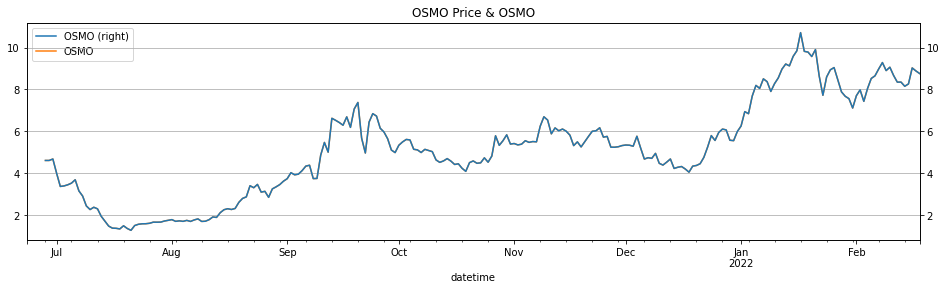

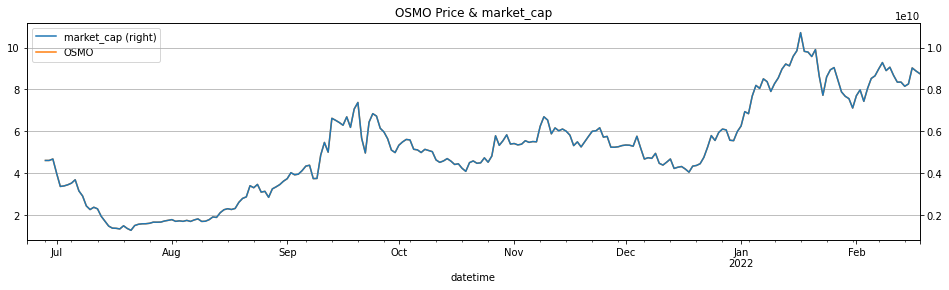

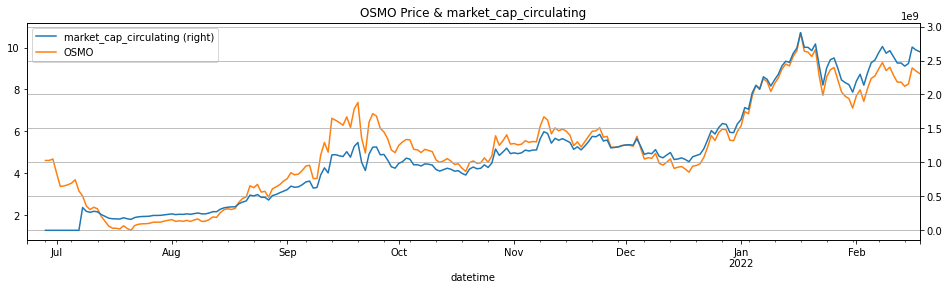

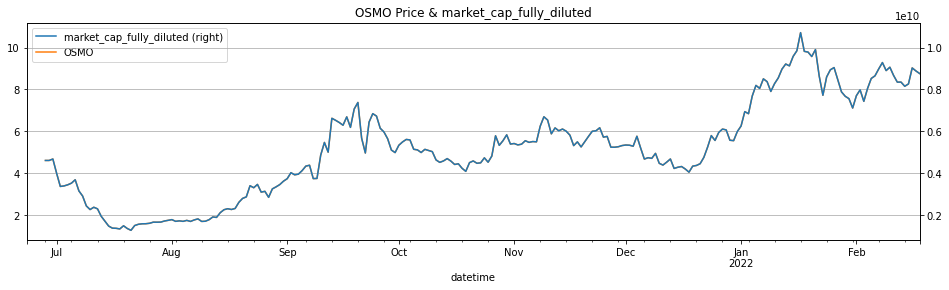

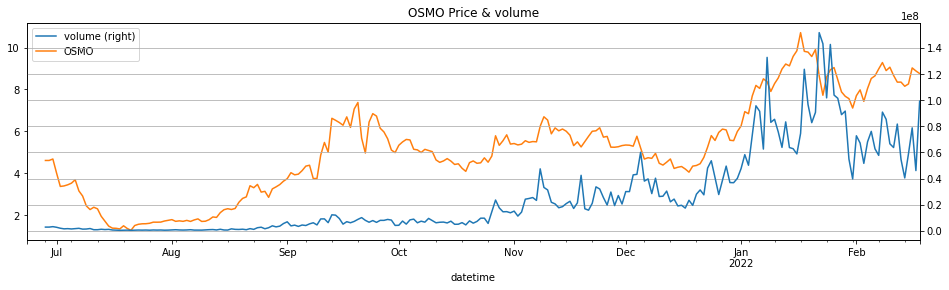

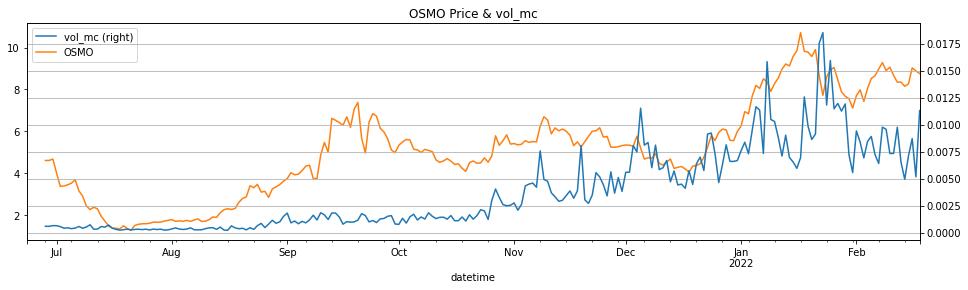

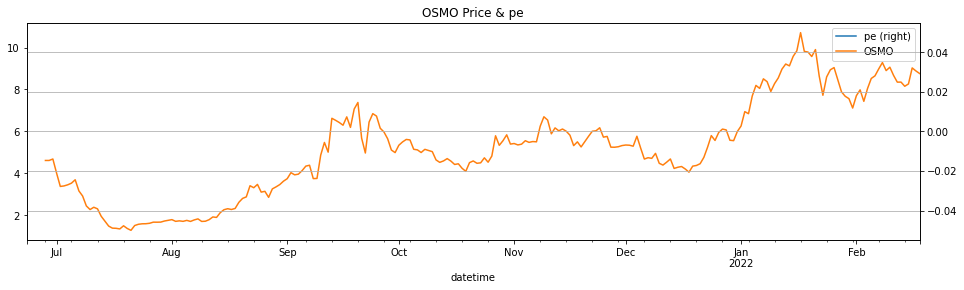

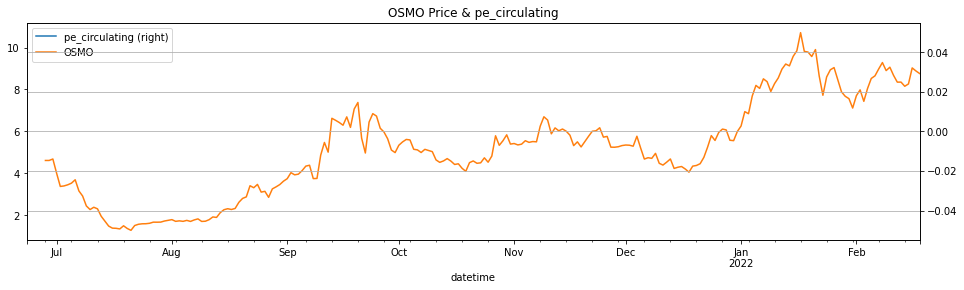

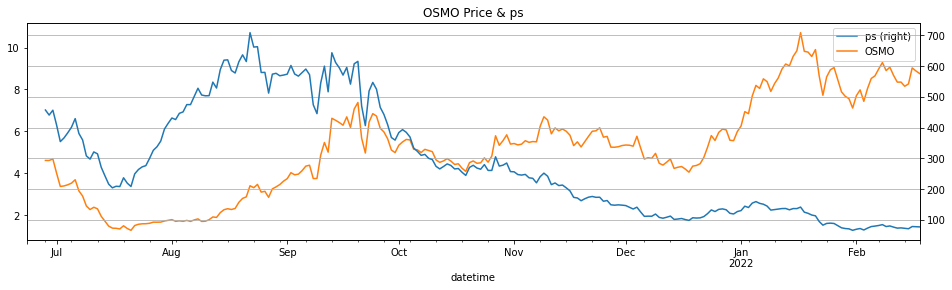

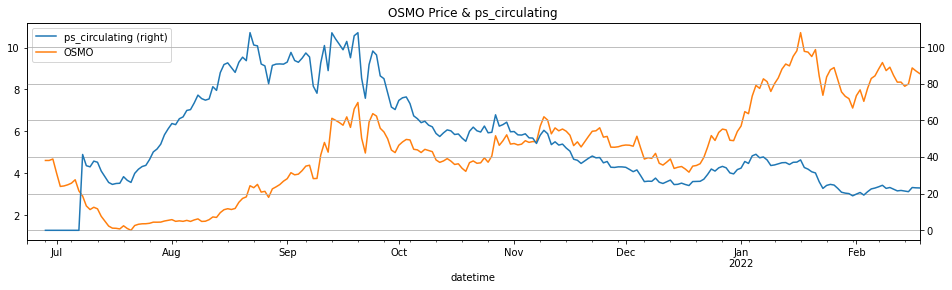

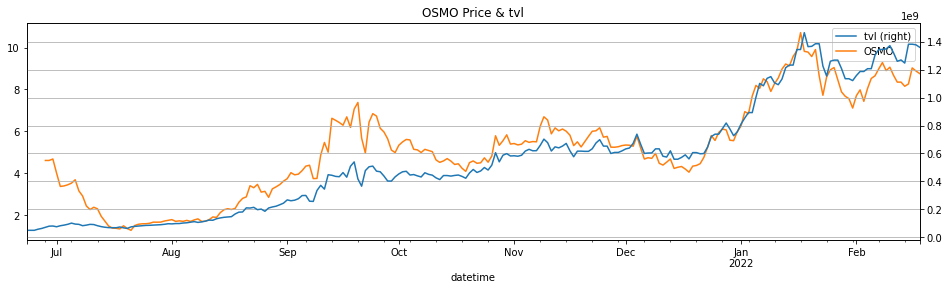

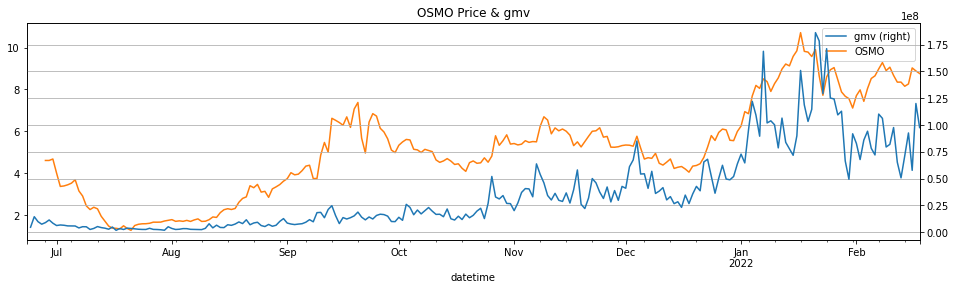

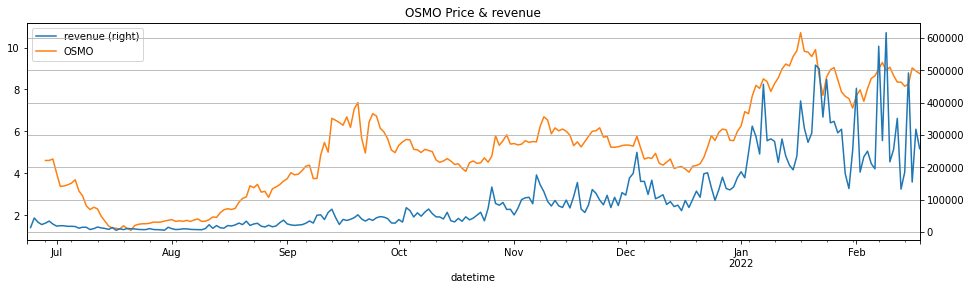

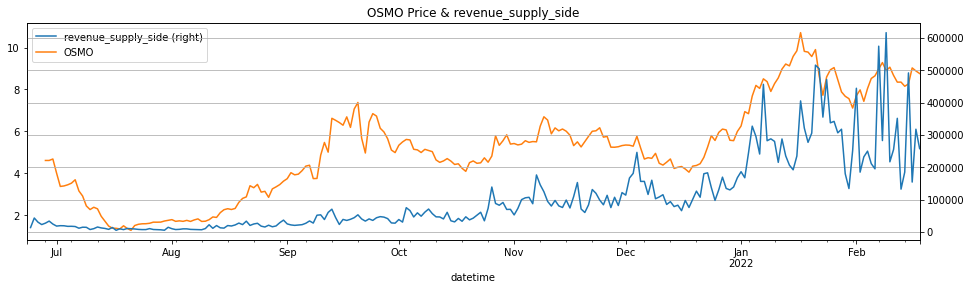

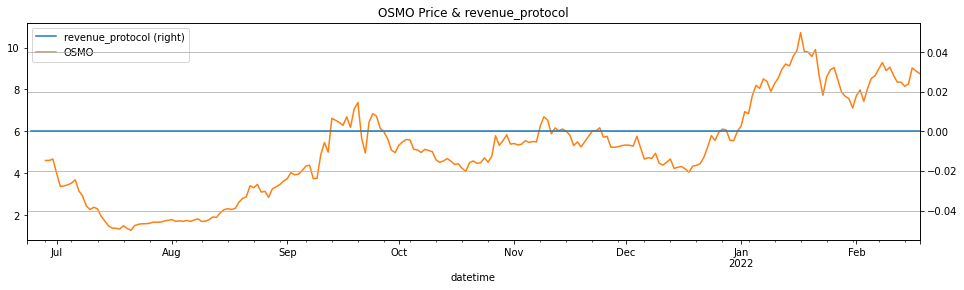

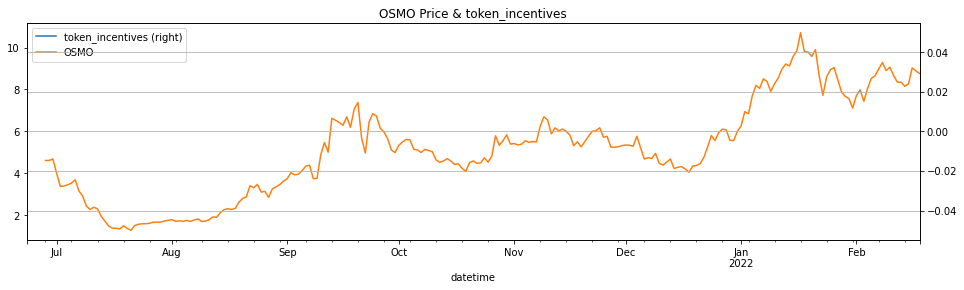

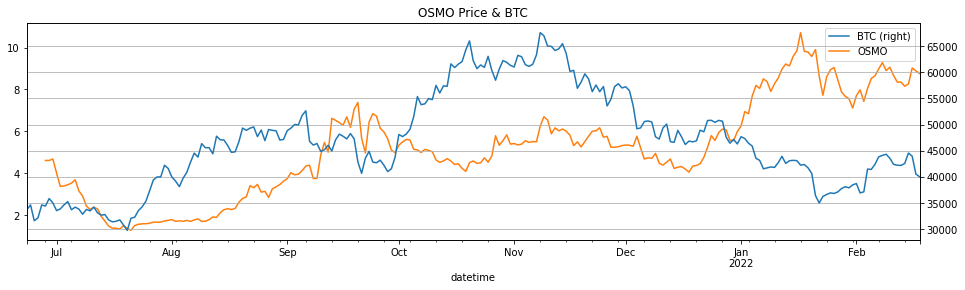

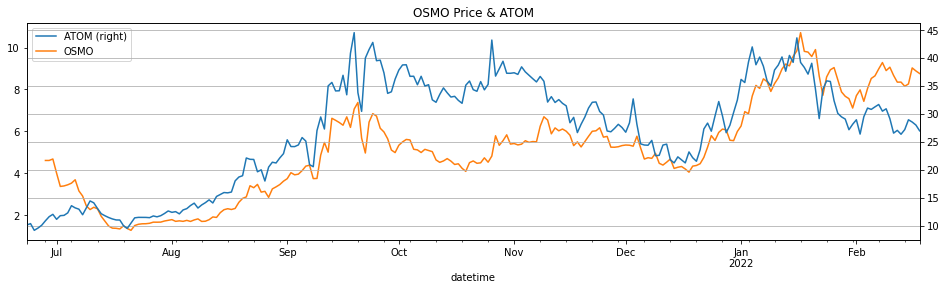

In [14]:
for plotName in osmosis.columns:
    try:
        ax = osmosis[[plotName]].plot(secondary_y = True)
        osmosis[['OSMO']].plot(figsize = (16,4), title = 'OSMO Price & {}'.format(plotName), ax = ax, grid = True);
    except:
        print("error: {}".format(plotName))

## 單一張圖

error: project
error: business_type
error: business_line
error: version
error: chain


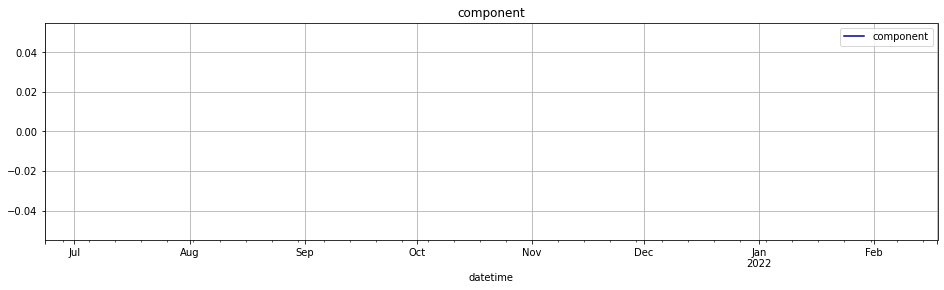

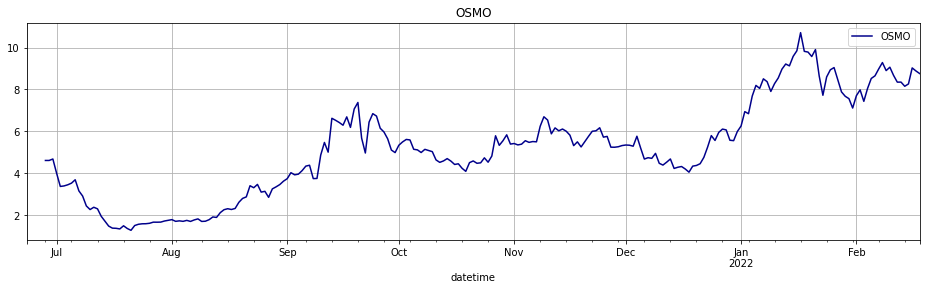

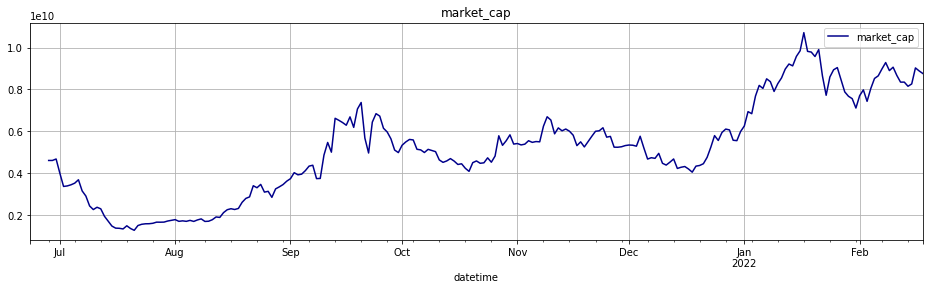

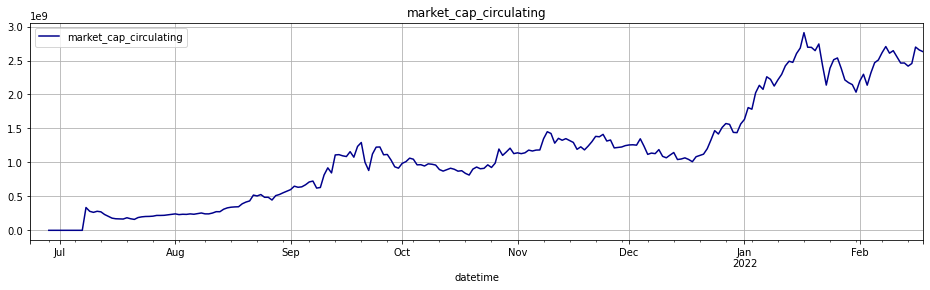

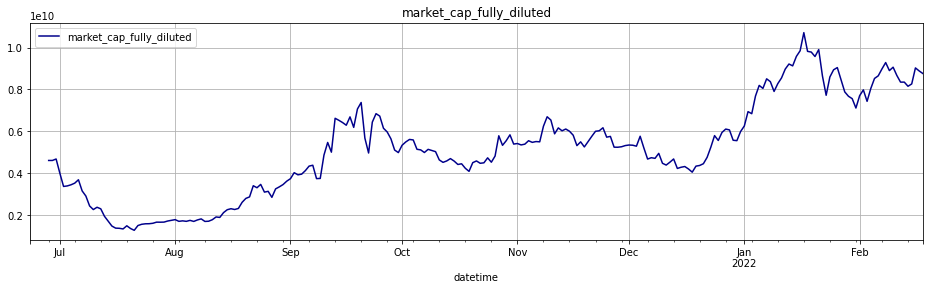

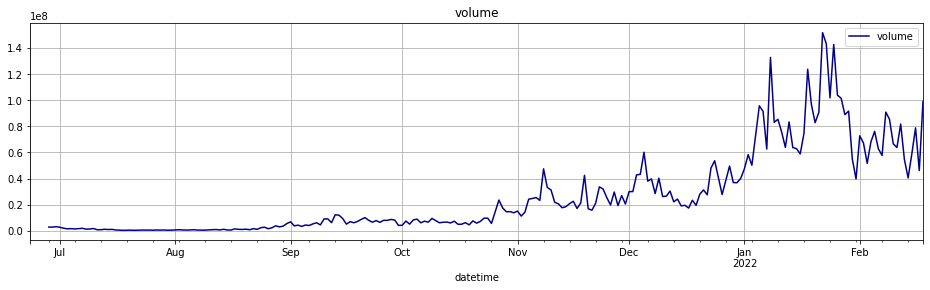

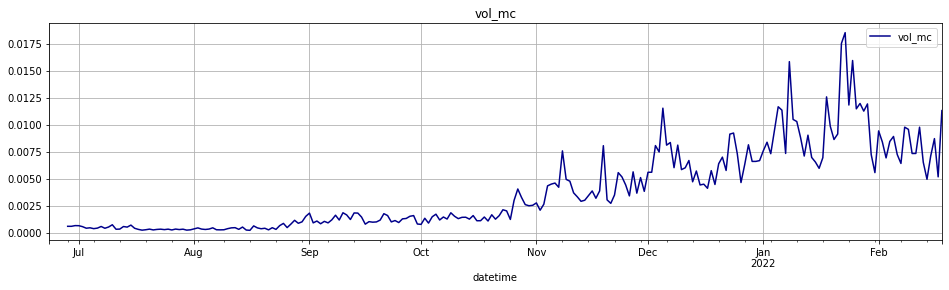

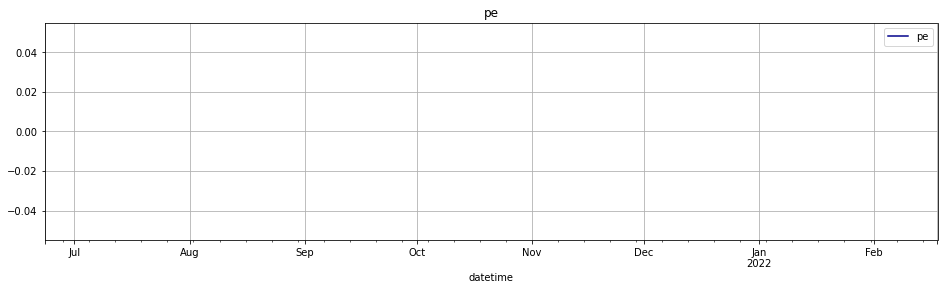

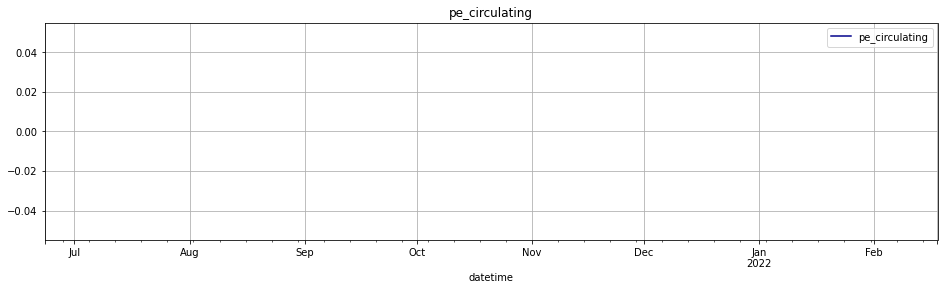

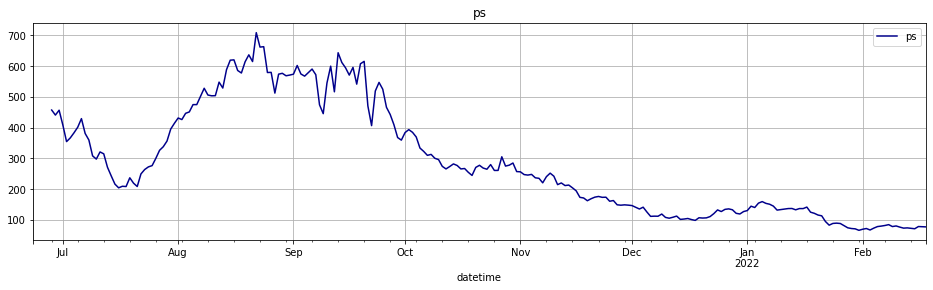

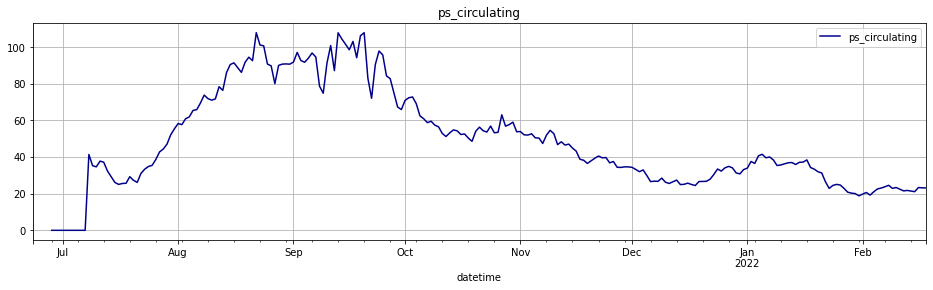

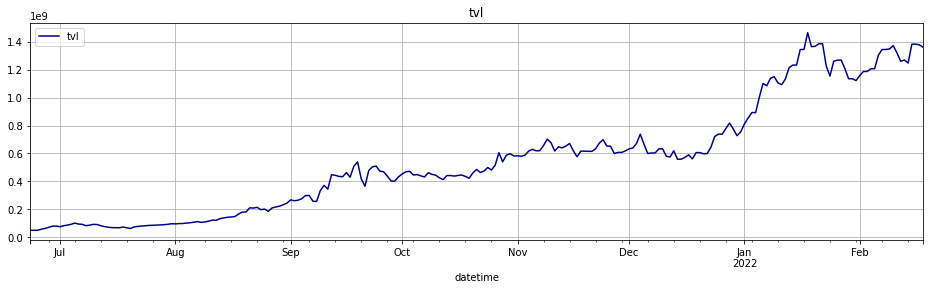

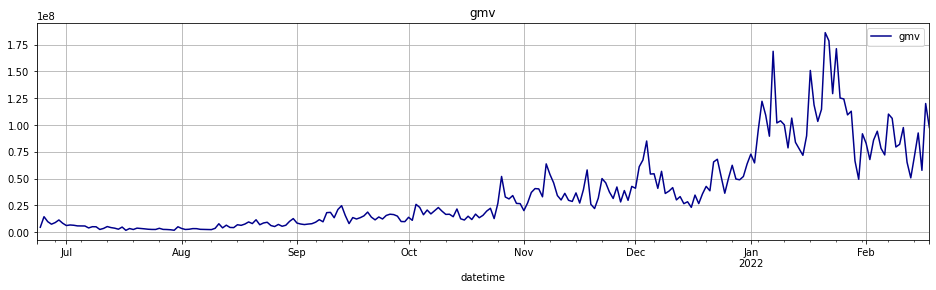

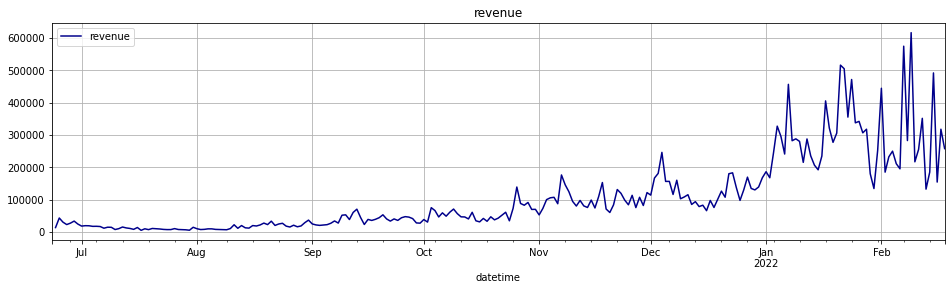

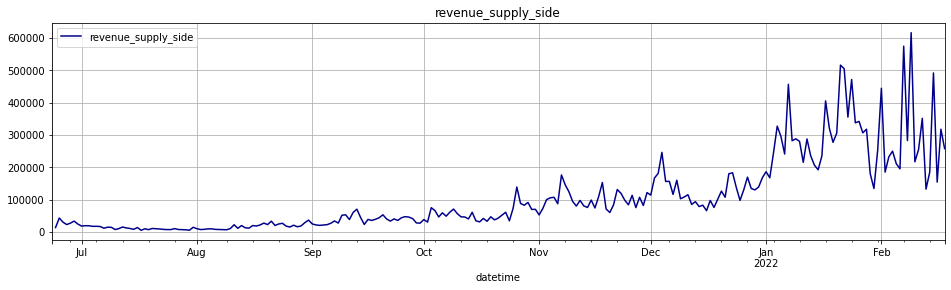

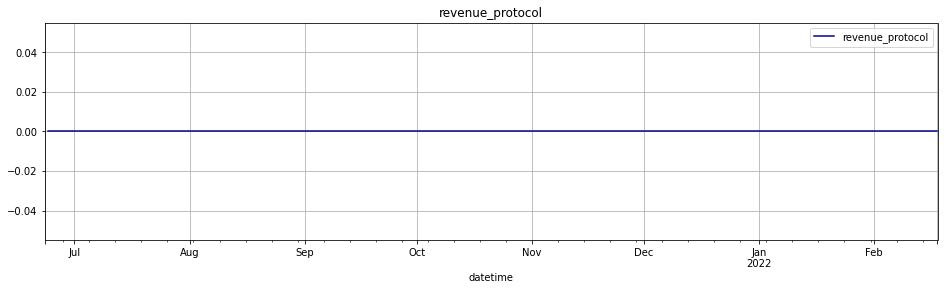

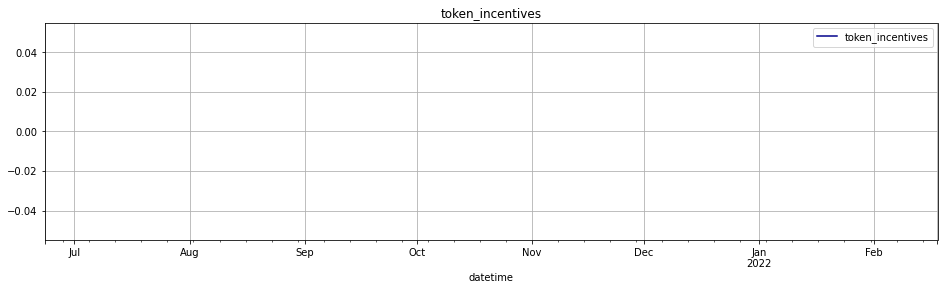

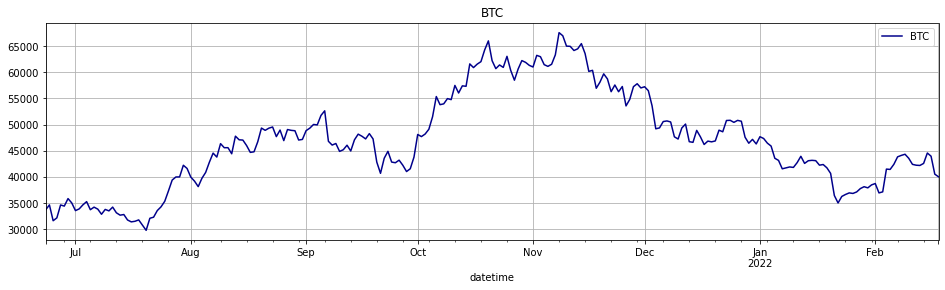

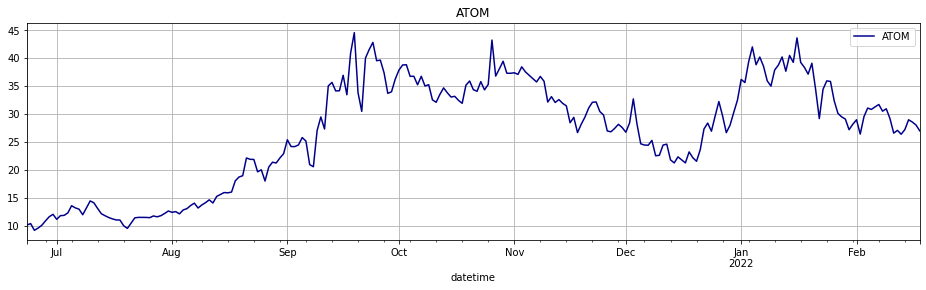

In [15]:
for plotName in osmosis.columns:
    try:
        osmosis[[plotName]].plot(figsize = (16,4), title = plotName, grid = True, c = 'darkblue');
    except:
        print("error: {}".format(plotName))

## 其他

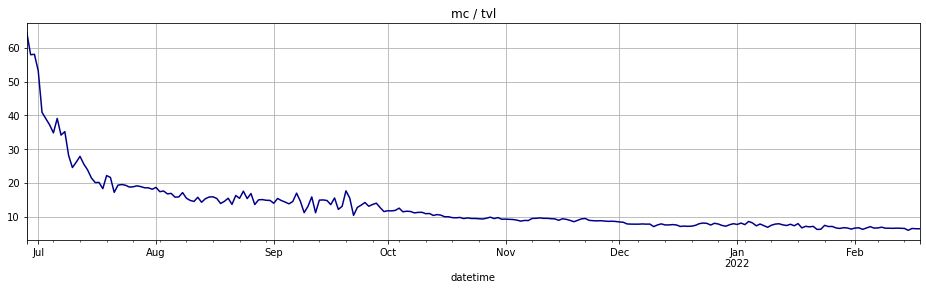

In [16]:
((osmosis['market_cap'] / osmosis['tvl']).dropna()).plot(figsize = (16,4), title = 'mc / tvl', grid = True, c = 'darkblue');

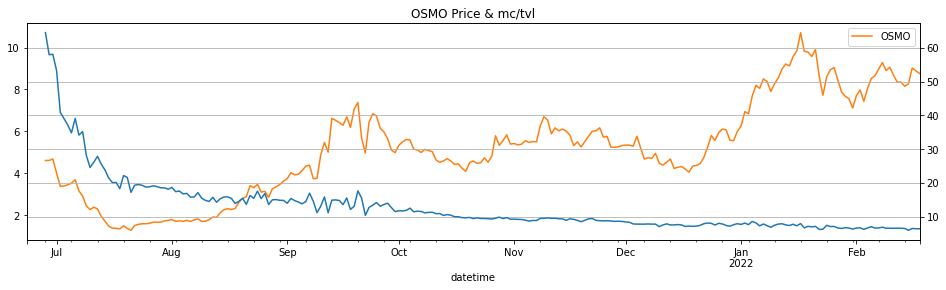

In [17]:
ax = ((osmosis['market_cap'] / osmosis['tvl']).dropna()).plot(secondary_y = True)
osmosis[['OSMO']].plot(figsize = (16,4), title = 'OSMO Price & mc/tvl'.format(plotName), ax = ax, grid = True);